<a href="https://colab.research.google.com/github/luyuzhe111/machine-learning-foundamentals/blob/main/bias_variance_trade_off.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.utils import shuffle

In [10]:
with open('data/hw2_p2.pkl', 'rb') as f:
    data = pickle.load(f)

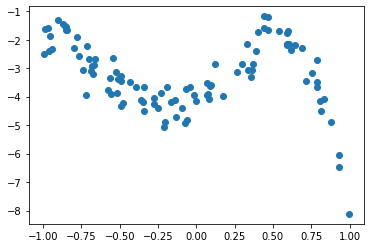

In [13]:
plt.scatter(data['x'], data['y'])
plt.show()

### Problem 1

In [33]:
def compute_mse(pred, gt):
  error = np.sqrt(((gt - pred) ** 2).mean())
  return error

In [41]:
from collections import defaultdict

In [46]:
x, y = shuffle(data['x'], data['y'])
x_train = x[:50]
x_test = x[50:]

y_train = y[:50]
y_test = y[50:]

train_errors = defaultdict(list)
test_errors = defaultdict(list)
for d in range(1, 16):
  X = np.stack([x_train ** i for i in range(0, d + 1)], axis=-1)
  w = np.linalg.inv(X.T @ X) @ X.T @ y_train
  
  y_train_pred = X @ w.T

  X_test = np.stack([x_test ** i for i in range(0, d + 1)], axis=-1)
  y_test_pred = X_test @ w.T
  
  train_mse = compute_mse(y_train_pred, y_train)
  test_mse = compute_mse(y_test_pred, y_test)
  
  train_errors[d].append(train_mse)
  test_errors[d].append(test_mse)

In [49]:
print(train_errors, test_errors)

defaultdict(<class 'list'>, {1: [0.9360260719912403], 2: [0.9130857415896471], 3: [0.6587762841774587], 4: [0.4413357624587492], 5: [0.43468642003063207], 6: [0.4343661499848192], 7: [0.4083983384629419], 8: [0.4083190434776121], 9: [0.40826347786719247], 10: [0.40230465254806363], 11: [0.4010361873386649], 12: [0.39367850171666435], 13: [0.39204347510855475], 14: [0.38741211850041446], 15: [0.3848912282361554]}) defaultdict(<class 'list'>, {1: [1.355412472630724], 2: [1.3366074995981245], 3: [0.8919123677639845], 4: [0.4768473529691626], 5: [0.49905158937498745], 6: [0.5002723430860887], 7: [0.5470893458271028], 8: [0.5411573471971617], 9: [0.5468597704898532], 10: [0.5321784214131771], 11: [0.5923825721078847], 12: [0.5875168813939418], 13: [0.5373061260596713], 14: [1.2125407015693834], 15: [0.8560289981790351]})


### Problem 2

In [52]:
train_errors = defaultdict(list)
test_errors = defaultdict(list)
for _ in range(1000):
  x, y = shuffle(data['x'], data['y'])
  x_train = x[:50]
  x_test = x[50:]

  y_train = y[:50]
  y_test = y[50:]

  for d in range(1, 16):
    X = np.stack([x_train ** i for i in range(0, d + 1)], axis=-1)
    w = np.linalg.inv(X.T @ X) @ X.T @ y_train
    
    y_train_pred = X @ w.T

    X_test = np.stack([x_test ** i for i in range(0, d + 1)], axis=-1)
    y_test_pred = X_test @ w.T
    
    train_mse = compute_mse(y_train_pred, y_train)
    test_mse = compute_mse(y_test_pred, y_test)
    
    train_errors[d].append(train_mse)
    test_errors[d].append(test_mse)

### Problem 3

In [63]:
train_mmse_by_degree = []
for d in range(1, 16):
  train_error_lst = train_errors[d]
  train_error_array = np.array(train_error_lst)
  train_mmse_by_degree.append(train_error_array.mean())

### Problem 4

In [64]:
abs_mse_diff_by_degree = []
for d in range(1, 16):
  train_error_lst = train_errors[d]
  train_error_array = np.array(train_error_lst)

  test_error_lst = test_errors[d]
  test_error_array = np.array(test_error_lst)

  abs_mse_diff_by_degree.append(np.std(np.abs(train_error_array - test_error_array)))

### Problem 5

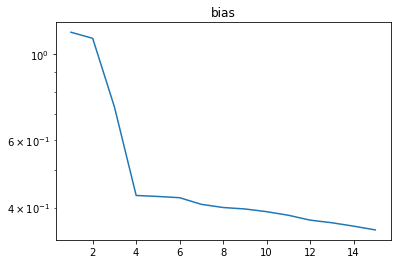

In [69]:
plt.plot(range(1, 16), train_mmse_by_degree)
plt.yscale("log")
plt.title('bias')
plt.show()

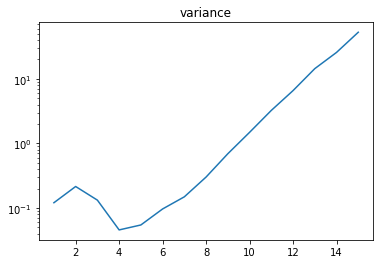

In [70]:
plt.plot(range(1, 16), abs_mse_diff_by_degree)
plt.yscale("log")
plt.title('variance')
plt.show()

I think degree 4 is the best model to use because it provides a good balance between bias and variance (according the plots above). 